# Импорт

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec


# Загрузка Датасета

In [2]:
data = pd.read_csv(
    '../../DATA/Ters/Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа).csv').drop('Unnamed: 0', axis=1)


In [3]:
data.columns

Index(['Доходы гостиниц и аналогичных средств размещения',
       'Число гостиниц и средств размещения',
       'Численность размещенных лиц в гостиницах и ананлогичных средствах размещения',
       'Число ночевок в гостиницах и ананлогичных средствах размещения',
       'Средняя численность работников, включая внешних совместителей',
       'Число туристских фирм',
       'Средства, поступившие от реализации туристкого продукта',
       'Число реализованных турпакетов населению', 'Индекс стоимости жизни',
       'year'],
      dtype='object')

# Предобработка

In [4]:
data = data.apply(lambda s: s.map(lambda a: float(a.replace(',', '.')) if type(a) is str else a))
names = data.columns.to_numpy()


# Постройка граффиков год/параметр

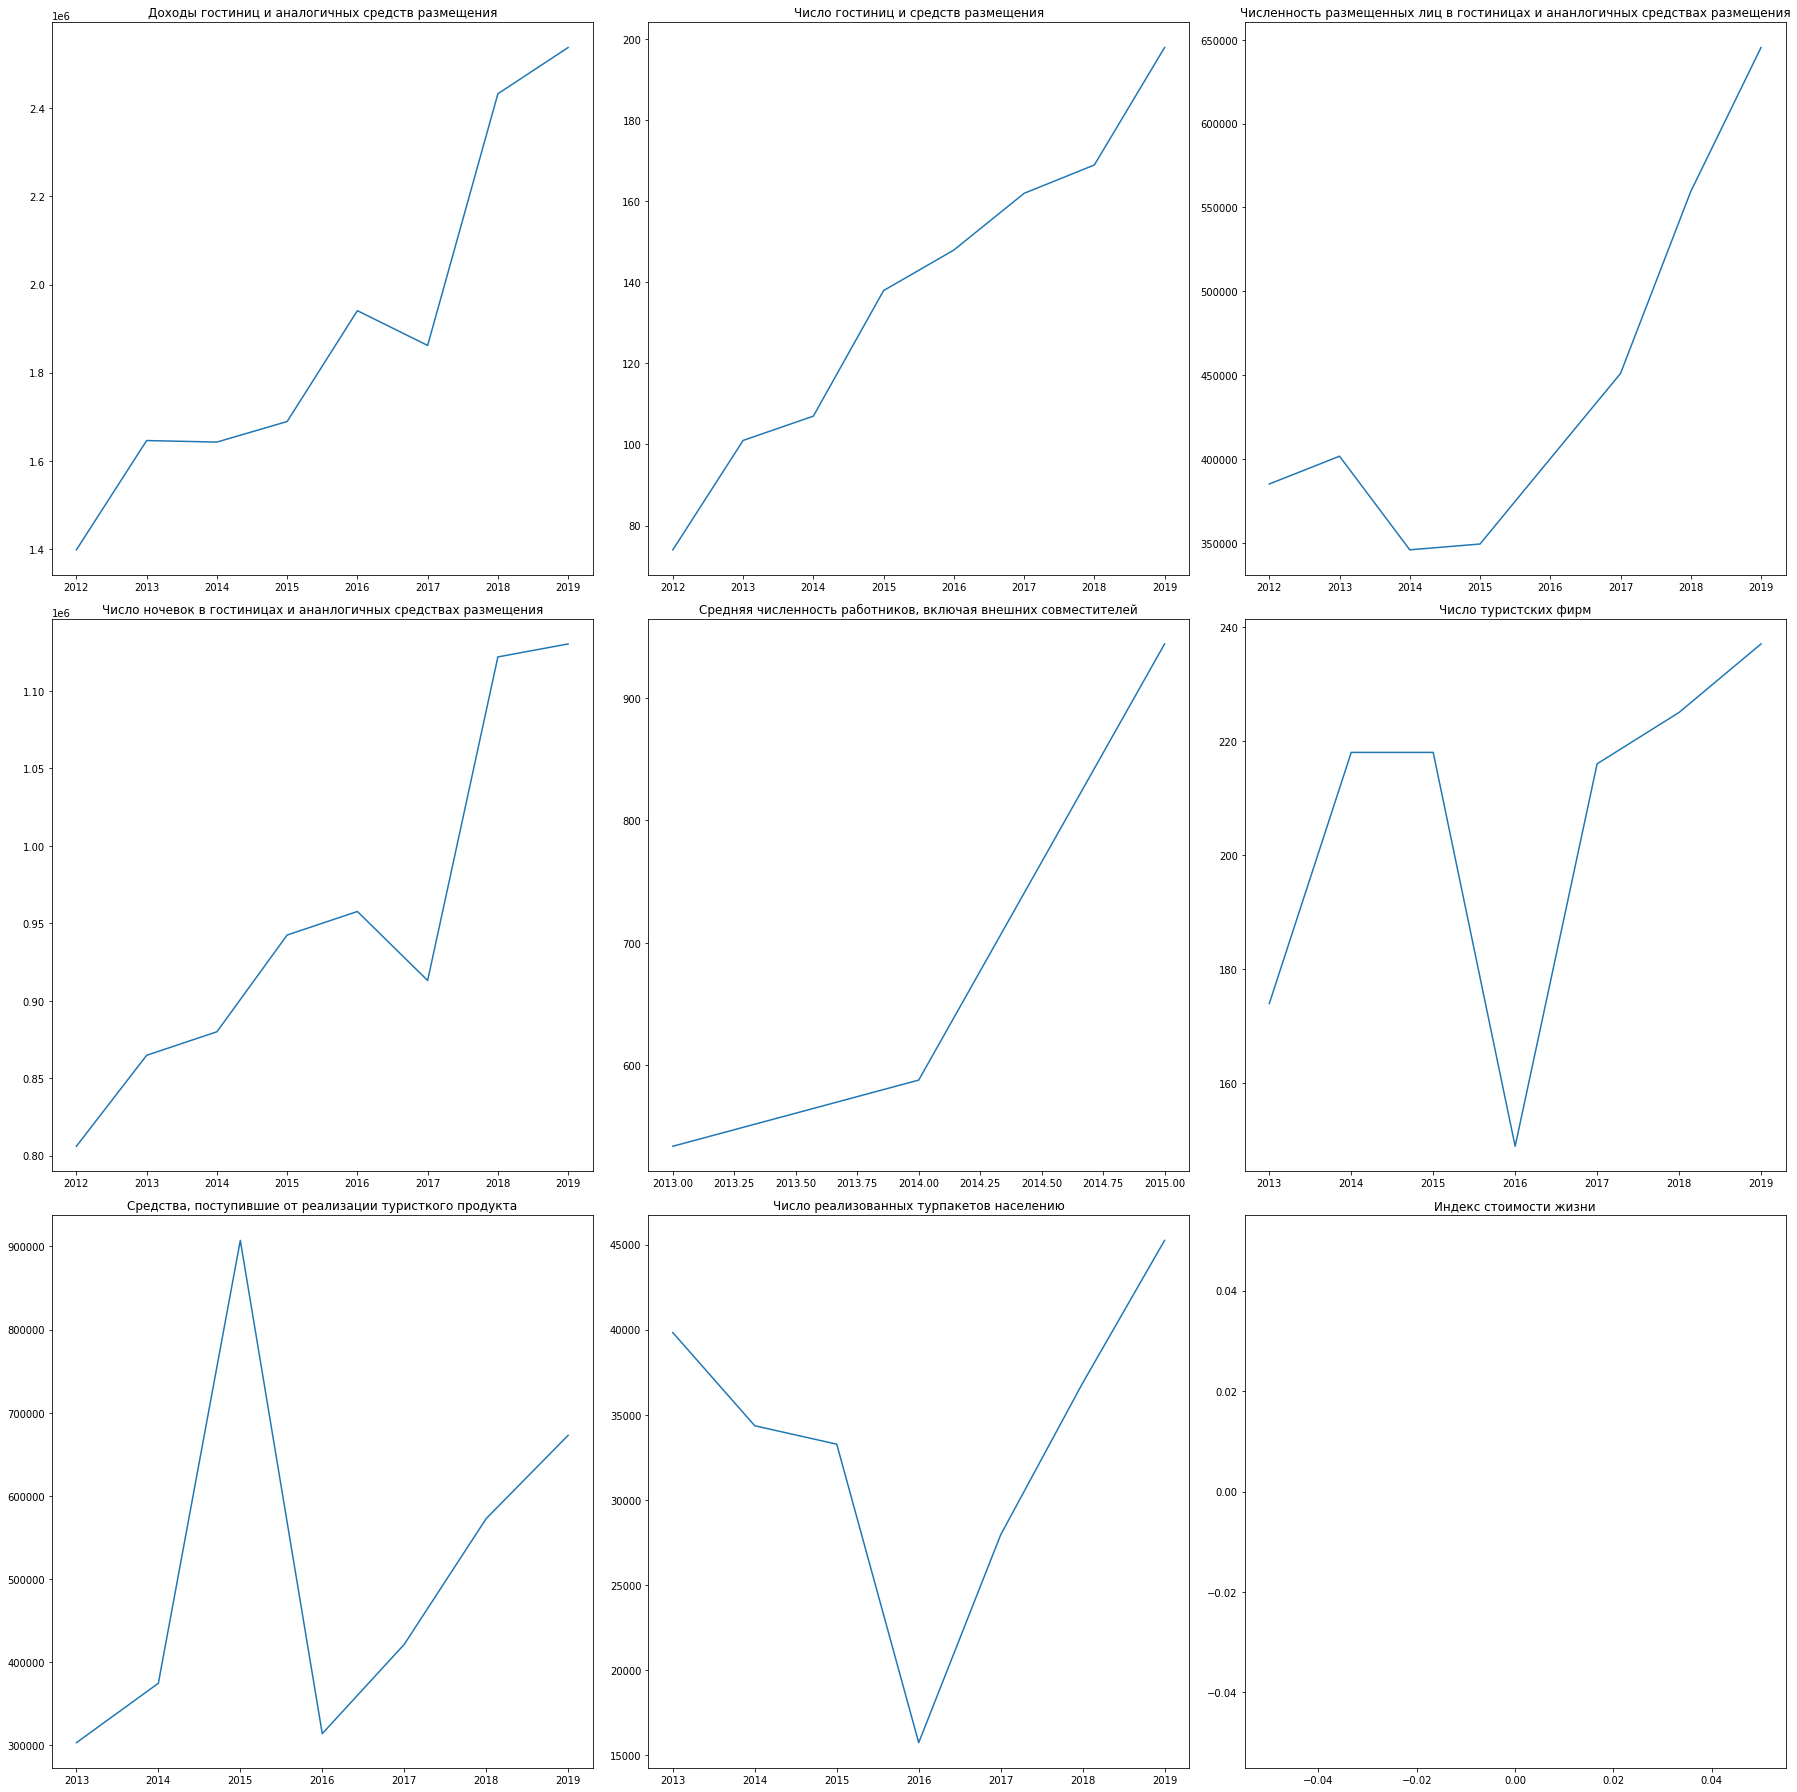

In [5]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(25)
fig.set_figwidth(25)
gs = gridspec.GridSpec(3, 3)
n = 0
for i in range(3):
  for j in range(3):
    ax = fig.add_subplot(gs[i, j])
    ax.plot(data['year'], data[names[n]])
    ax.set_title(names[n])
    n+=1

# Кореляция между параметрами

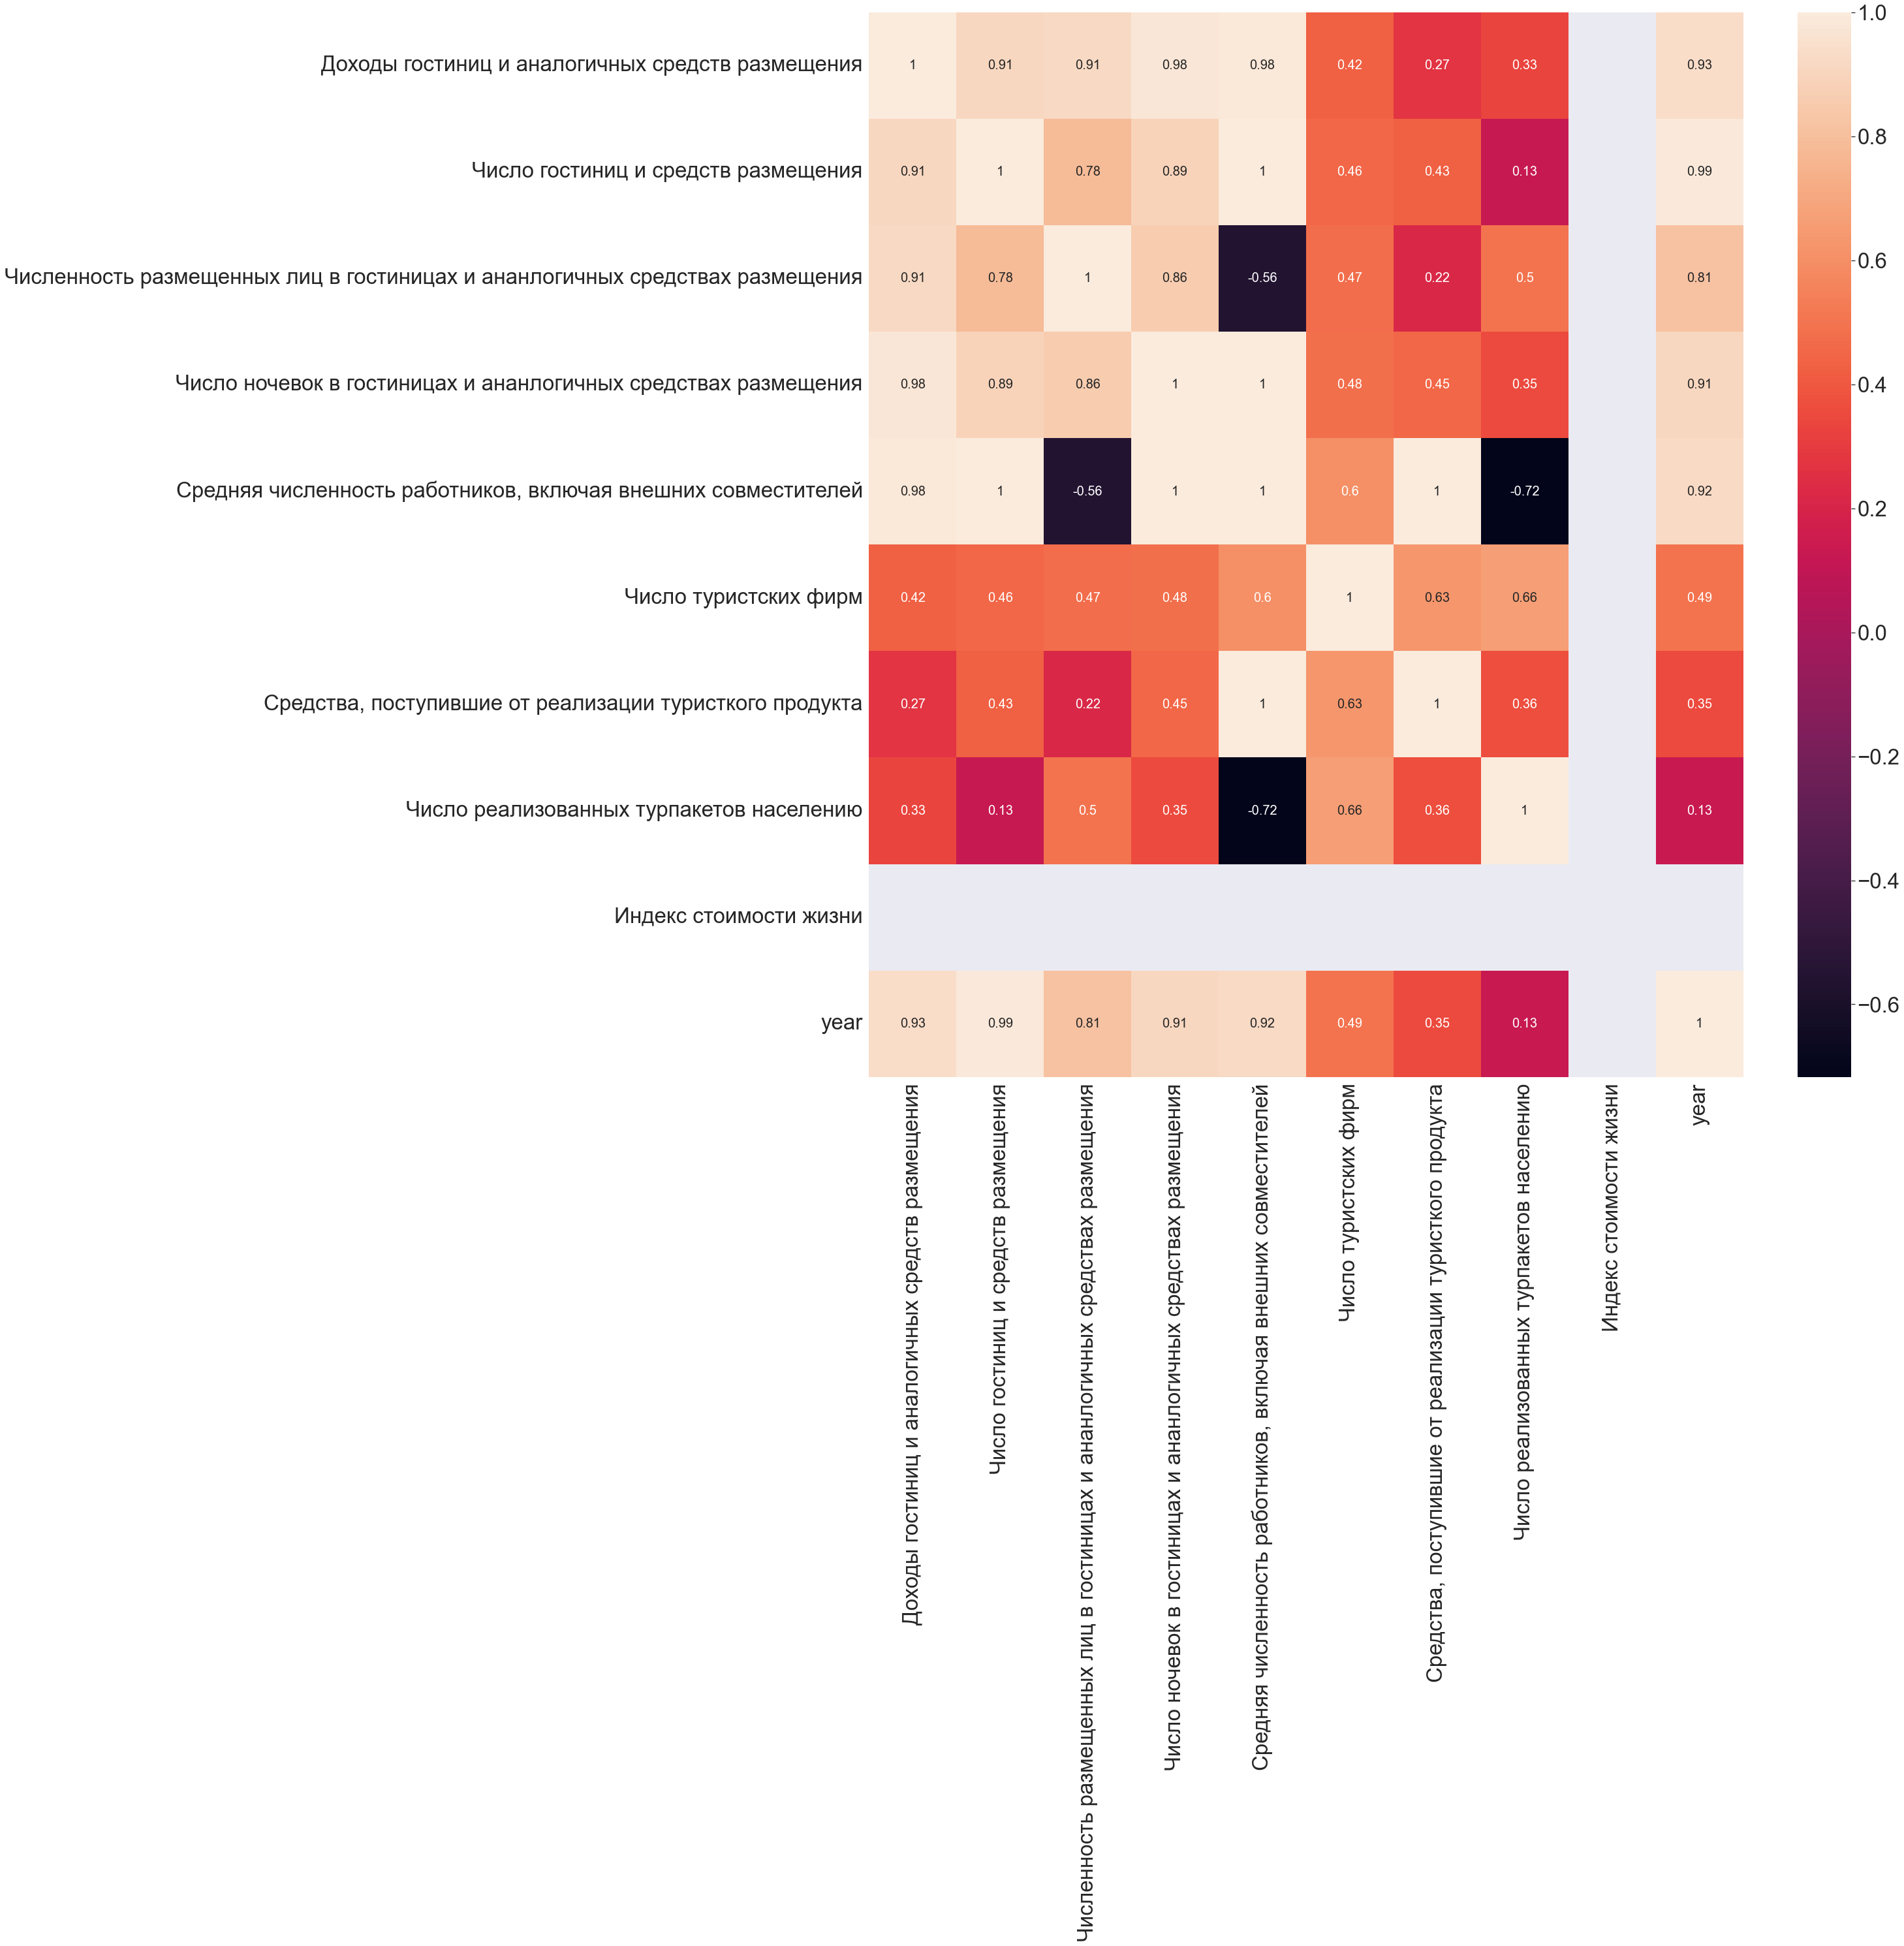

In [7]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(method='pearson'), annot=True, annot_kws={"fontsize":20}).get_figure()
sns.set(font_scale=3)
